Exercise 3

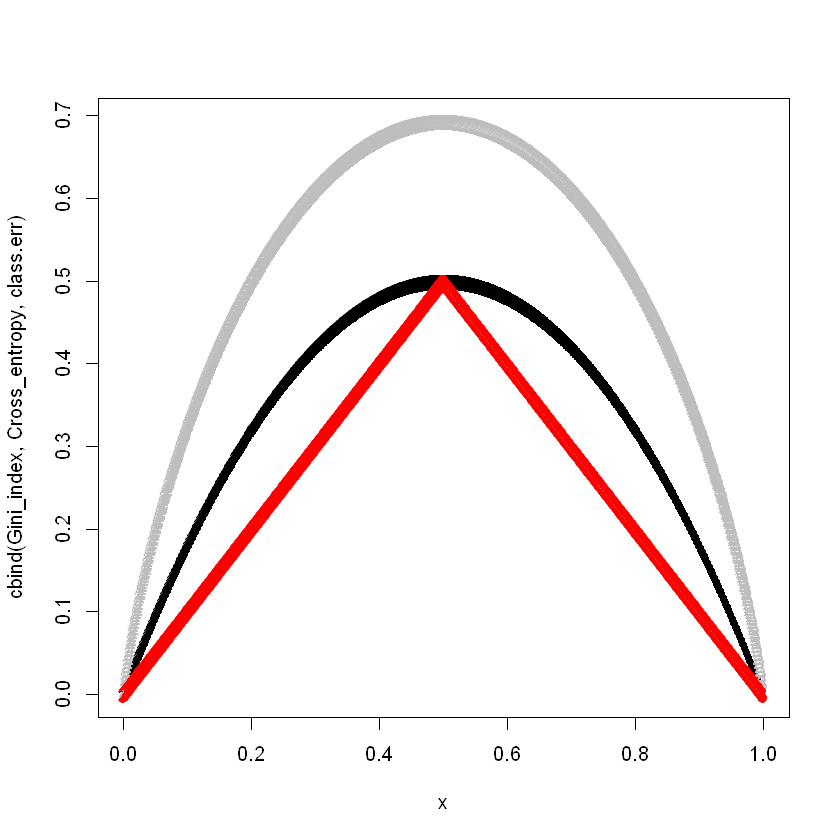

In [5]:
x = seq(0, 1, 0.001)
Gini_index = x * (1 - x) * 2
Cross_entropy = -(x * log(x) + (1 - x) * log(1 - x))
Class_err = 1 - pmax(x, 1 - x)
matplot(x, cbind(Gini_index, Cross_entropy, class.err), col = c("black", "grey", "red"))

Exercise 5

In [6]:
x = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [7]:
#Majority Approach
sum(x >= 0.5) > sum(x < 0.5)

[1] TRUE

Red predictors are more than green predictors thus Red

In [8]:
#Average Approach
mean(x)

[1] 0.45

Mean is less than 50% thus green

Exercise8

In [40]:
library(ISLR)
attach(Carseats)
set.seed(123)

In [41]:
#a
train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
train_data = Carseats[train, ]
test_data = Carseats[-train, ]

In [42]:
#b
reg_tree = tree(Sales ~ ., data = train_data)
summary(reg_tree)


Regression tree:
tree(formula = Sales ~ ., data = train_data)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "Age"         "Population" 
[6] "Education"   "CompPrice"   "Advertising"
Number of terminal nodes:  18 
Residual mean deviance:  2.132 = 388.1 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.08000 -0.92870  0.06244  0.00000  0.87020  3.71700 

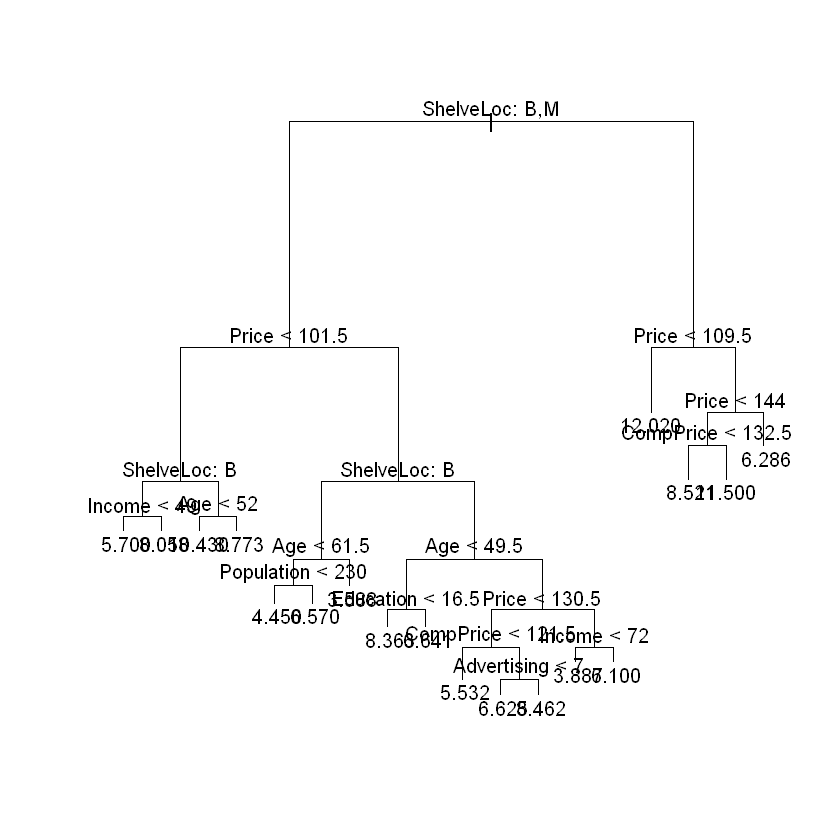

In [49]:
plot(reg_tree)
text(reg_tree, pretty = 1)

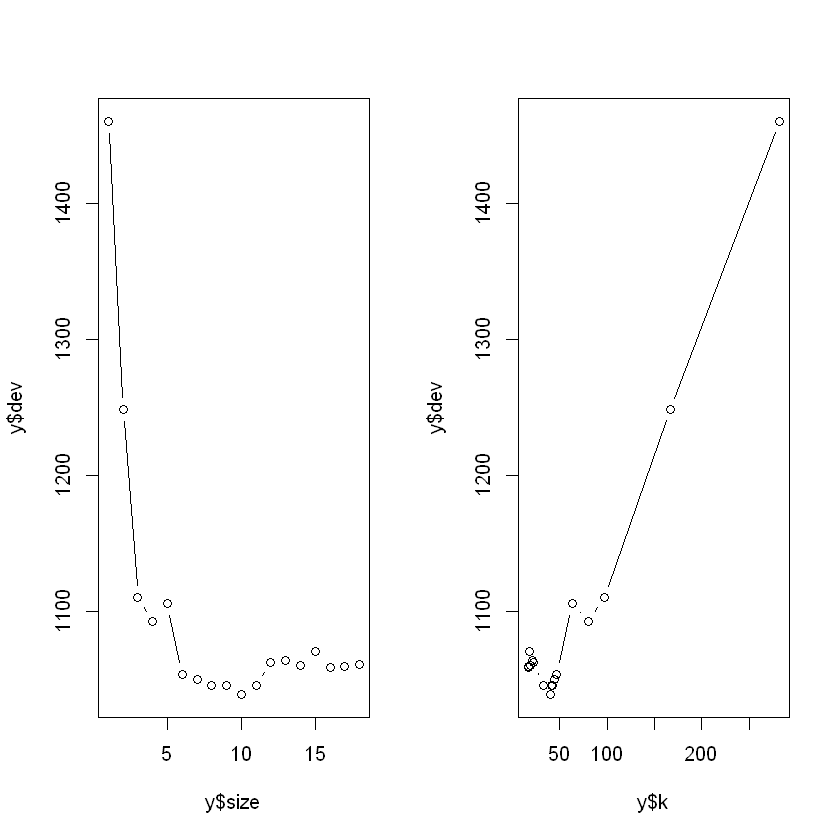

In [52]:
#c
y = cv.tree(reg_tree, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(y$size, y$dev, type = "b")
plot(y$k, y$dev, type = "b")

Exercise 9

In [15]:
library(ISLR)
attach(OJ)
set.seed(123)

The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




In [17]:
#a
train = sample(dim(OJ)[1], 800)
train_data = OJ[train, ]
test_data = OJ[-train, ]

In [22]:
#b
install.packages("tree")
library(tree)
data_tree = tree(Purchase ~ ., data = OJ.train)
summary(data_tree)

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aghoslya\AppData\Local\Temp\Rtmp2tZu9O\downloaded_packages



Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [23]:
#c
data_tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1071.00 CH ( 0.60875 0.39125 )  
   2) LoyalCH < 0.5036 350  415.10 MM ( 0.28000 0.72000 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.0356415 56   10.03 MM ( 0.01786 0.98214 ) *
       9) LoyalCH > 0.0356415 114  108.90 MM ( 0.18421 0.81579 ) *
     5) LoyalCH > 0.276142 180  245.20 MM ( 0.42222 0.57778 )  
      10) PriceDiff < 0.05 74   74.61 MM ( 0.20270 0.79730 ) *
      11) PriceDiff > 0.05 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 450  357.10 CH ( 0.86444 0.13556 )  
     6) PriceDiff < -0.39 27   32.82 MM ( 0.29630 0.70370 ) *
     7) PriceDiff > -0.39 423  273.70 CH ( 0.90071 0.09929 )  
      14) LoyalCH < 0.705326 130  135.50 CH ( 0.78462 0.21538 )  
        28) PriceDiff < 0.145 43   58.47 CH ( 0.58140 0.41860 ) *
        29) PriceDiff > 0.145 87   62.07 CH ( 0.88506 0.11494 ) *
      15) LoyalCH > 0.705326 293  112.50 CH ( 0.952

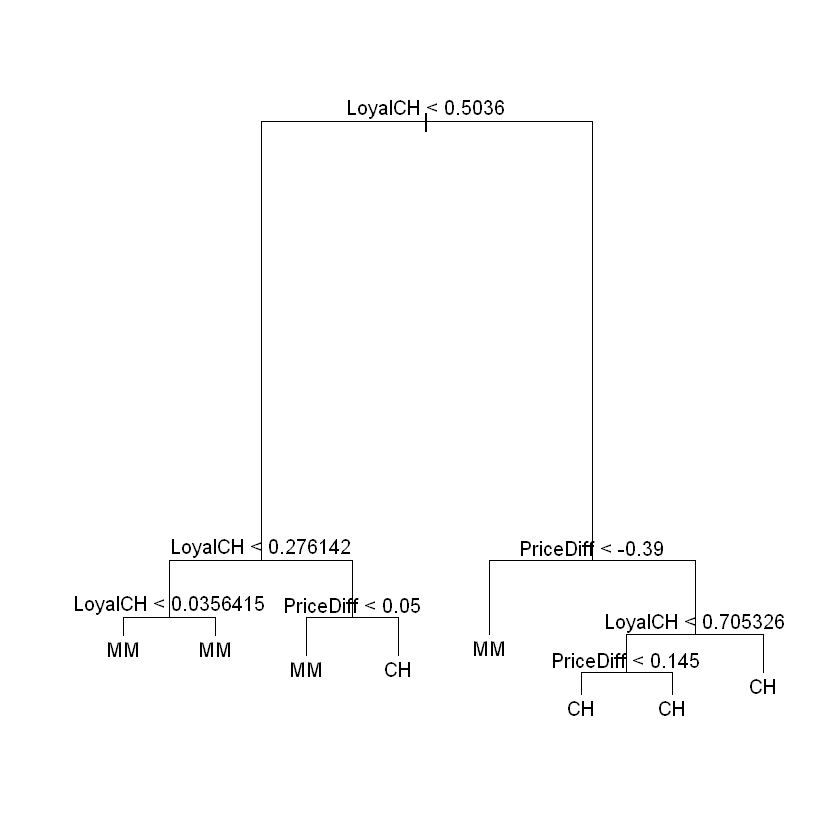

In [28]:
#d
plot(data_tree)
text(data_tree)

In [29]:
#e
pred = predict(data_tree, test_data, type = "class")
table(test_data$Purchase, pred)

    pred
      CH  MM
  CH 162  18
  MM  31  59

In [32]:
#f
free_size = cv.tree(data_tree, FUN = prune.tree)
print(free_size)

$size
[1] 8 7 6 5 4 3 2 1

$dev
[1]  695.0516  696.4492  694.6440  730.6748  730.6748  768.0189  792.4446
[8] 1071.8705

$k
[1]      -Inf  12.03823  14.92474  25.76707  26.02613  38.91686  50.61655
[8] 298.68751

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"


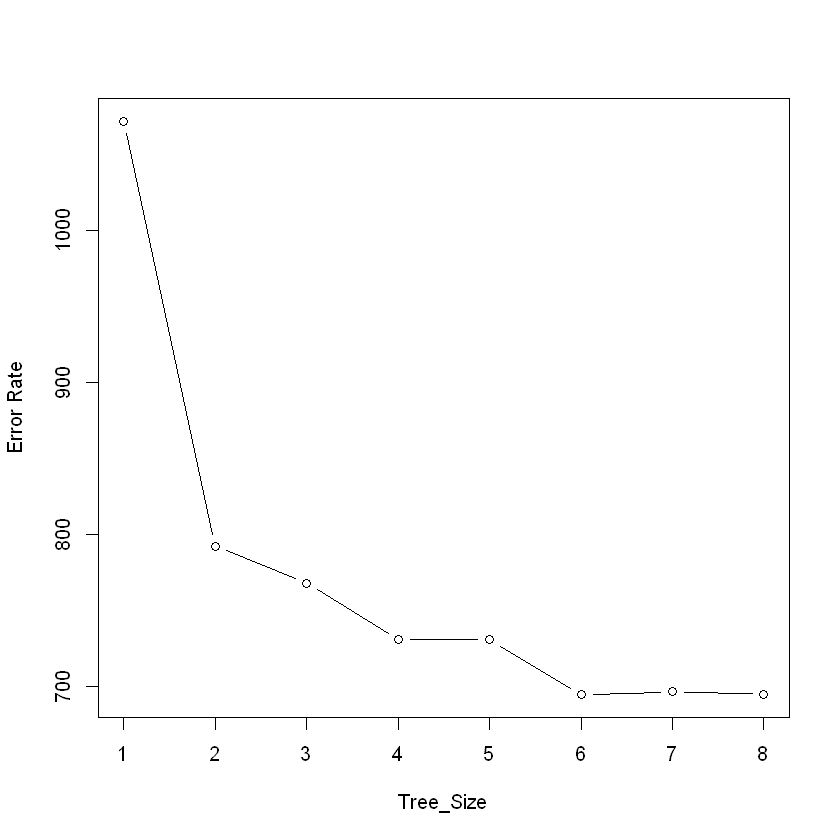

In [53]:
#g
plot(free_size$size, free_size$dev, type = "b", xlab = "Tree_Size", ylab = "Error Rate")

h
size of 6

In [38]:
#i
tree_pruned = prune.tree(data_tree, best = 6)
print(tree_pruned)

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1071.00 CH ( 0.60875 0.39125 )  
   2) LoyalCH < 0.5036 350  415.10 MM ( 0.28000 0.72000 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 ) *
     5) LoyalCH > 0.276142 180  245.20 MM ( 0.42222 0.57778 )  
      10) PriceDiff < 0.05 74   74.61 MM ( 0.20270 0.79730 ) *
      11) PriceDiff > 0.05 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 450  357.10 CH ( 0.86444 0.13556 )  
     6) PriceDiff < -0.39 27   32.82 MM ( 0.29630 0.70370 ) *
     7) PriceDiff > -0.39 423  273.70 CH ( 0.90071 0.09929 )  
      14) LoyalCH < 0.705326 130  135.50 CH ( 0.78462 0.21538 ) *
      15) LoyalCH > 0.705326 293  112.50 CH ( 0.95222 0.04778 ) *


In [39]:
#j
summary(tree_pruned)


Classification tree:
snip.tree(tree = data_tree, nodes = c(4L, 14L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7945 = 630.9 / 794 
Misclassification error rate: 0.165 = 132 / 800 

Exercise 10

In [55]:
library(ISLR)

In [56]:
#a
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))

[1] 0

In [57]:
Hitters$Salary = log(Hitters$Salary)

In [58]:
Hitters$Salary

[1] 6.163315 6.173786 6.214608 4.516339 6.620073 4.248495 4.605170 4.317488
  [9] 7.003065 6.248319 6.239301 6.309918 6.551080 5.480639 6.652863 5.164786
 [17] 4.905275 4.605170 4.744932 6.396930 6.655012 6.639876 6.562914 6.620073
 [25] 6.437752 6.802395 4.700480 6.417549 5.703782 6.745236 4.499810 4.212128
 [33] 5.192957 5.720312 5.370638 5.511411 6.703188 6.774224 4.248495 7.090077
 [41] 6.514713 6.028279 5.828946 6.032287 7.207860 4.499810 5.616771 5.438079
 [49] 5.416100 6.856462 4.317488 4.653960 5.768321 6.745236 6.282267 6.838762
 [57] 6.745236 5.347108 5.783825 5.616771 6.109248 7.588324 7.549609 6.396930
 [65] 6.948578 4.700480 5.560682 6.163315 6.067268 7.106606 4.248495 4.976734
 [73] 6.388561 7.529116 5.703782 6.194405 7.807917 5.926926 6.620073 7.069023
 [81] 4.248495 7.313220 5.953243 7.562978 5.370638 6.802395 5.043425 6.551080
 [89] 6.282267 5.893024 6.597600 5.298317 5.991465 5.991465 6.603266 6.214608
 [97] 6.396930 6.496021 6.856462 6.620073 5.695414 5.783825 4.471639 5.164786
[105] 4.499810 7.120848 6.063785 4.605170 5.105945 5.521461 7.170120 6.650710
[113] 6.916054 5.616771 6.652863 6.745236 5.899897 4.553877 4.700480 4.605170
[121] 5.625821 4.382027 6.396930 5.298317 6.487684 4.317488 7.788419 5.521461
[129] 5.043425 6.461468 5.703782 4.700480 6.715383 5.273000 6.109248 6.445720
[137] 4.460144 7.170120 6.907755 7.495542 7.177782 6.603266 6.437752 4.828314
[145] 6.950176 6.586172 5.703782 5.899897 4.317488 7.076090 5.310740 5.416100
[153] 6.263398 5.579730 6.668863 6.684612 6.375876 4.976734 6.040255 4.317488
[161] 6.354370 6.659294 4.499810 5.010635 6.551080 6.309918 6.476972 4.219508
[169] 4.605170 6.507278 5.164786 4.919981 7.662624 6.774224 4.787492 4.941642
[177] 5.347108 6.684612 5.480639 5.857933 5.164786 5.298317 7.570443 6.551080
[185] 6.620073 6.109248 5.147494 7.138867 6.620073 5.247024 6.363028 4.867534
[193] 6.109248 5.703782 5.521461 6.956545 5.370638 5.991465 6.327937 7.420579
[201] 6.189290 6.052089 6.214608 5.521461 5.991465 6.109248 6.620073 4.248495
[209] 6.774224 5.247024 5.252273 6.606650 5.521461 4.941642 4.579852 6.606650
[217] 4.941642 5.833837 6.907755 4.605170 4.499810 5.298317 4.905275 5.043425
[225] 6.163315 7.279319 5.010635 4.653960 5.857933 4.499810 6.272877 5.833837
[233] 6.845880 5.857933 5.788941 5.521461 6.606650 6.052089 6.829794 5.220356
[241] 6.824374 5.658321 5.501258 5.459586 7.047517 5.075174 6.052089 6.802395
[249] 6.214608 5.625821 6.620073 5.075174 7.170120 6.263398 6.309918 7.377759
[257] 4.787492 5.105945 6.551080 6.774224 5.953243 6.866933 6.907755

In [59]:
#b
train = 1:200
train_data = Hitters[train, ]
test_data = Hitters[-train, ]